In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import the dataset

In [ ]:
data = pd.read_excel('/content/Concrete_Data.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   ccs                 1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
ccs,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


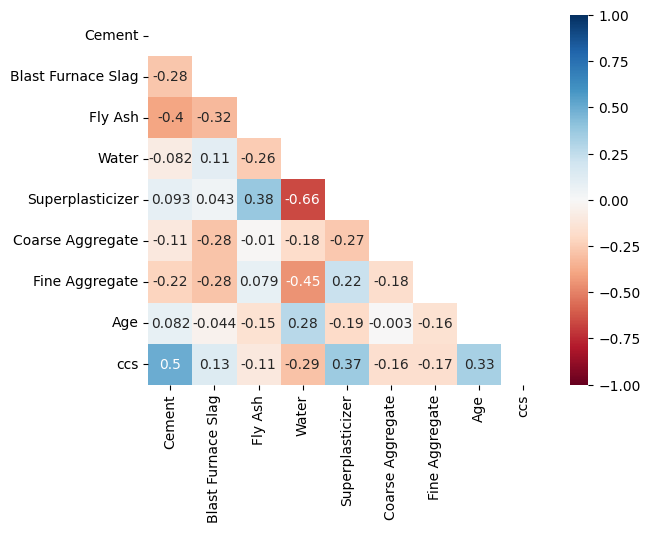

In [ ]:
# Correlation Plot
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',
            mask=np.triu(data.corr())) # np.triu is for masked the upper triangle
plt.show()

## Treat the defects

In [ ]:
# Missing Values
data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
ccs,0


In [ ]:
# Duplicates
data[data.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,ccs
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1005, 9)

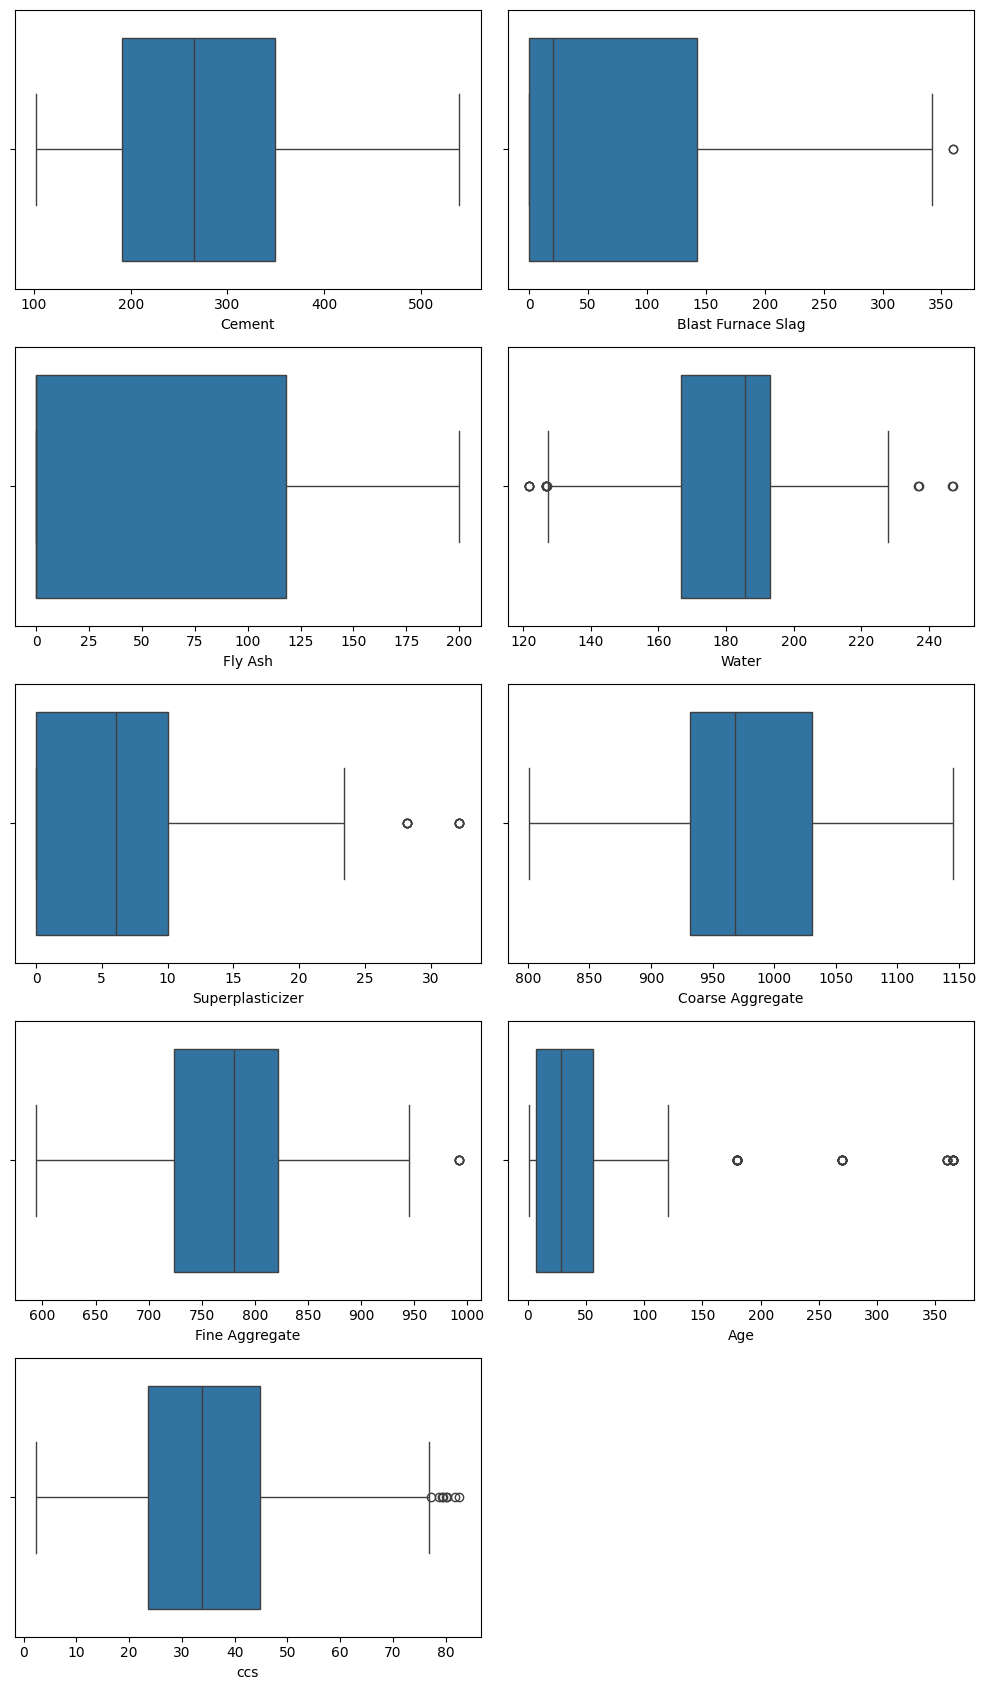

In [ ]:
# Check for the outliers
t=1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Cappping
for i in data.columns:
    q3,q1 = np.percentile(data[i],[75,25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr, q1-1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

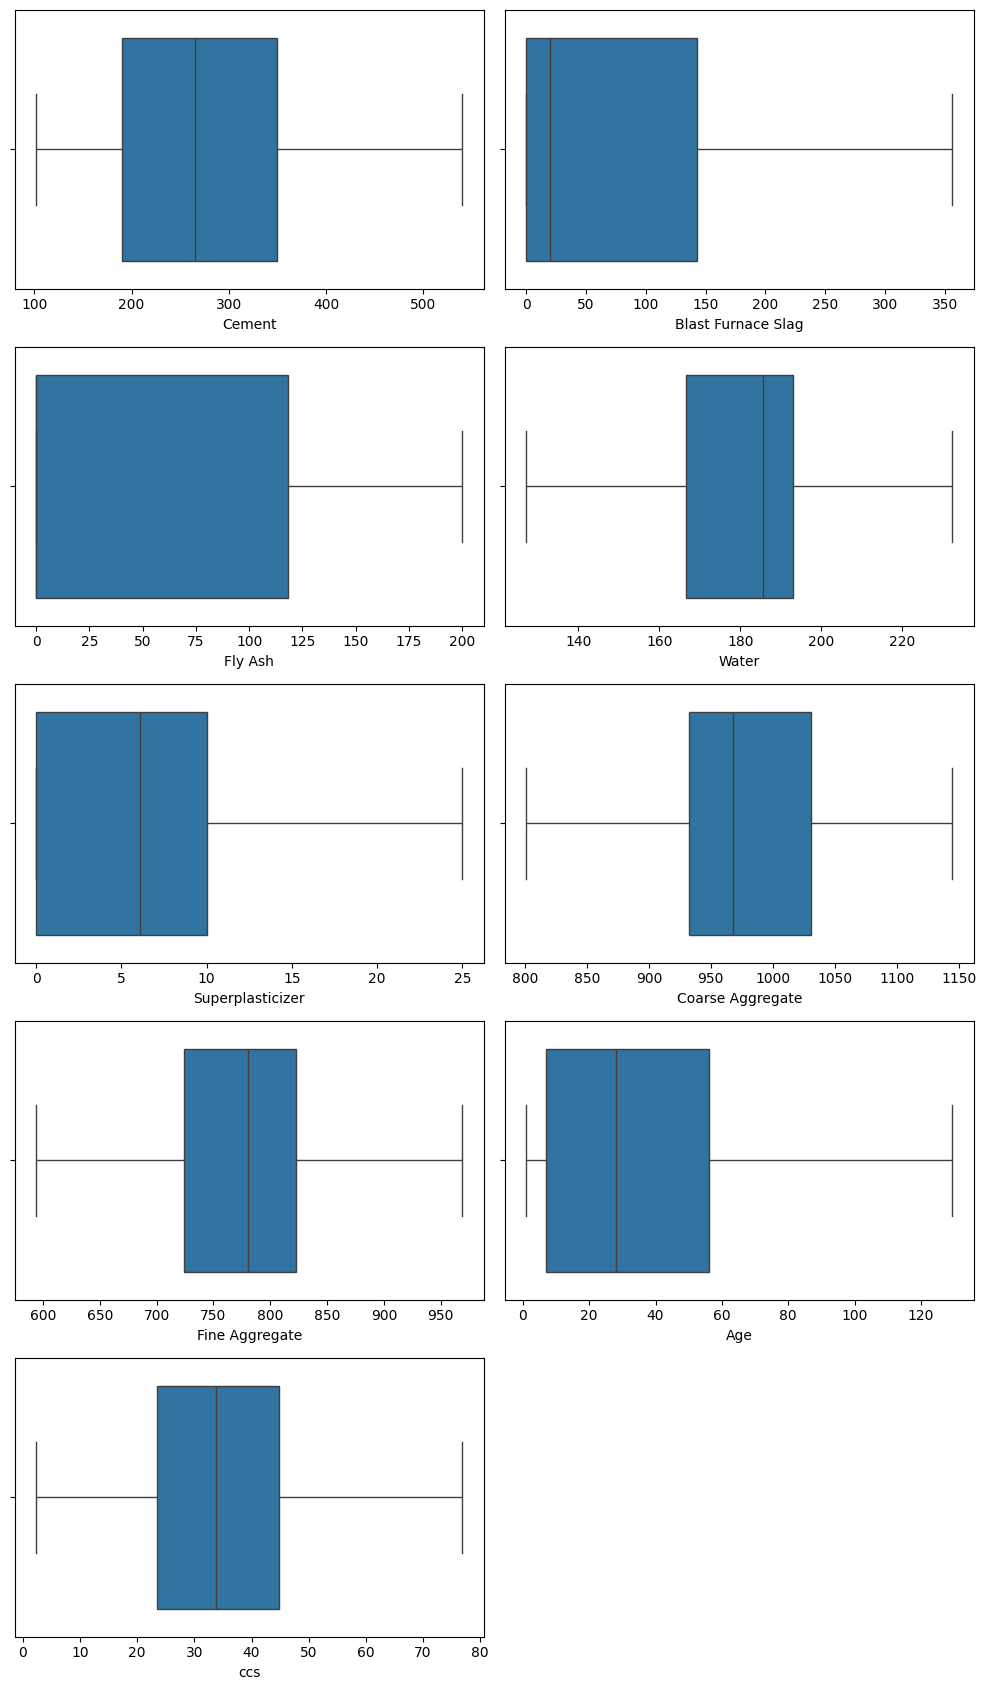

In [ ]:
t=1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Let's check if there is any null values in the data

data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
ccs,0


In [ ]:
# Lets split x and y
y = data['ccs']
x = data.drop(columns = 'ccs')

In [ ]:
# Add a constant x to have an intercept model

x_c = sma.add_constant(x)
sma.OLS(y,x_c).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     322.7
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.10e-270
Time:                        03:59:25   Log-Likelihood:                -3583.1
No. Observations:                1005   AIC:                             7184.
Df Residuals:                     996   BIC:                             7228.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9349     22.392      0.176      0.861     -40.006      47.876
Cement                 0.1109      0.007     15.544      0.000       0.097       0.125
Blast Furnace Slag     0.0920      0.008     10.829      0.000       0.075       0.109
Fly Ash                0.0737      0.010      7.080      0.000       0.053       0.094
Water                 -0.1826      0.034     -5.337      0.000      -0.250      -0.115
Superplasticizer       0.2468      0.083      2.986      0.003       0.085       0.409
Coarse Aggregate       0.0060      0.008      0.766      0.444      -0.009       0.021
Fine Aggregate         0.0079      0.009      0.876      0.381      -0.010       0.026
Age                    0.2498      0.008     32.126      0.000       0.235       0.265
==============================================================================
Omnibus:                        5.538   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                6.047
Skew:                           0.107   Prob(JB):                       0.0486
Kurtosis:                       3.314   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Linear Regression Analysis**

## **Assumption 1: Numeric Target Variable**

## **Assumption 2: No MultiColinearity**

In [ ]:
# High Condition number suggest that high multicolinearity in the model

# In order find out which column have multico let's find out VIF(variance inflationm factor)

vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif = pd.DataFrame(vif,index=x.columns,columns=['VIF']).sort_values(by='VIF',ascending=False)
vif

,VIF
Coarse Aggregate,85.016957
Water,82.028328
Fine Aggregate,72.308018
Cement,15.213900
Superplasticizer,5.513072
Fly Ash,4.325332
Blast Furnace Slag,3.307520
Age,2.250063


In [ ]:
sma.OLS(y,x_c.drop(columns = ['Coarse Aggregate'])).fit().rsquared

0.7214599162155249

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Water'])).fit().rsquared

0.7136615388147228

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Cement'])).fit().rsquared

0.6540971411824044

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Superplasticizer'])).fit().rsquared

0.7191310699404883

In [ ]:
# Let's drop coarse aggregate and have a check on VIF
x_c.drop(columns = ['Coarse Aggregate'], inplace = True)
x.drop(columns = ['Coarse Aggregate'], inplace = True)

In [ ]:
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif = pd.DataFrame(vif,index=x.columns,columns=['VIF']).sort_values(by='VIF',ascending=False)
vif

,VIF
Water,72.333537
Fine Aggregate,47.949524
Cement,14.267535
Superplasticizer,5.464804
Fly Ash,4.159872
Blast Furnace Slag,3.278204
Age,2.248795


In [ ]:
sma.OLS(y,x_c.drop(columns = ['Water'])).fit().rsquared

0.690124606192207

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Cement'])).fit().rsquared

0.5625854377366295

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Superplasticizer'])).fit().rsquared

0.7190905002137542

In [ ]:
sma.OLS(y,x_c.drop(columns = ['Fine Aggregate'])).fit().rsquared

0.7214079179608109

In [ ]:
# Let's drop fine aggregate and have a check on VIF
x_c.drop(columns = ['Fine Aggregate'], inplace = True)
x.drop(columns = ['Fine Aggregate'], inplace = True)

In [ ]:
vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif = pd.DataFrame(vif,index=x.columns,columns=['VIF']).sort_values(by='VIF',ascending=False)
vif

,VIF
Water,21.626638
Cement,13.954376
Fly Ash,4.068454
Superplasticizer,3.918141
Blast Furnace Slag,2.991824
Age,2.234706


In [ ]:
# Let's Apply Feature Engineering so that we can keep both cement and water in the model as water to cement ratio.

x['water_cement_ratio'] = x['Water']/x['Cement']

x_c['water_cement_ratio'] = x_c['Water']/x_c['Cement']

# Now drop the columns water and cement

x.drop(columns = ['Water','Cement'], inplace = True)
x_c.drop(columns = ['Water','Cement'], inplace = True)

In [ ]:
# Now Have Look on VIF

vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

vif = pd.DataFrame(vif,index=x.columns,columns=['VIF']).sort_values(by='VIF',ascending=False)
vif

,VIF
water_cement_ratio,5.594984
Fly Ash,3.563203
Blast Furnace Slag,2.973004
Superplasticizer,2.544618
Age,1.864683


In [ ]:
# Let's fit the model over here

model = sma.OLS(y,x_c).fit() # Model with Intercept
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     397.3
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.49e-234
Time:                        03:59:25   Log-Likelihood:                -3675.6
No. Observations:                1005   AIC:                             7363.
Df Residuals:                     999   BIC:                             7393.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 39.5962      1.013     39.086      0.000      37.608      41.584
Blast Furnace Slag     0.0798      0.005     17.208      0.000       0.071       0.089
Fly Ash                0.0396      0.007      5.841      0.000       0.026       0.053
Superplasticizer       0.6002      0.068      8.862      0.000       0.467       0.733
Age                    0.2369      0.008     28.279      0.000       0.220       0.253
water_cement_ratio   -32.9598      1.296    -25.432      0.000     -35.503     -30.417
==============================================================================
Omnibus:                       49.960   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.364
Skew:                           0.441   Prob(JB):                     5.26e-16
Kurtosis:                       3.951   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Feature importances
model.pvalues.sort_values()

# less the pvalue more the significance

,0
const,1.644812e-203
Age,1.019237e-129
water_cement_ratio,2.023594e-110
Blast Furnace Slag,2.551503e-58
Superplasticizer,3.541361e-18
Fly Ash,7.008803e-09


## **Assumption 3 : Linearity**

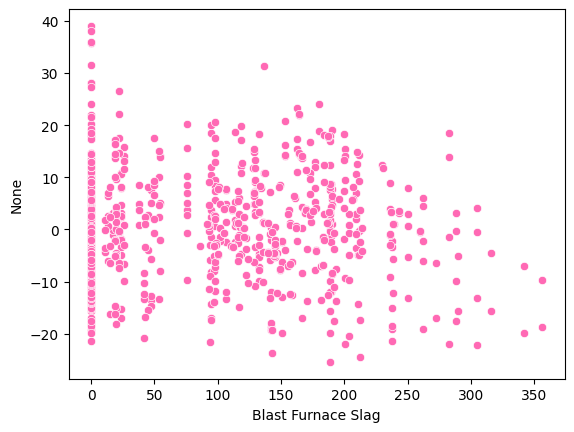

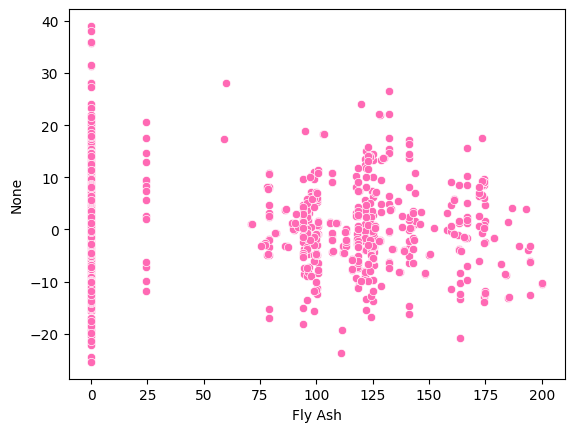

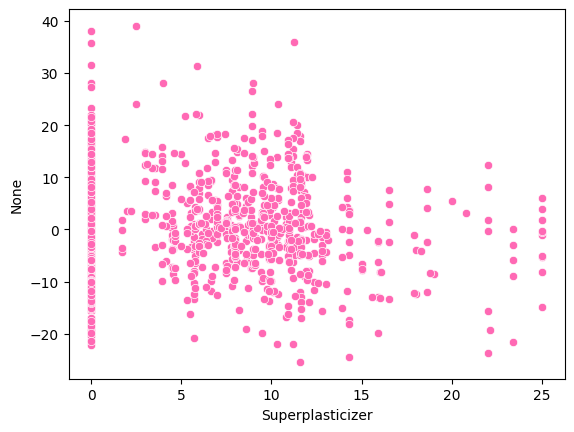

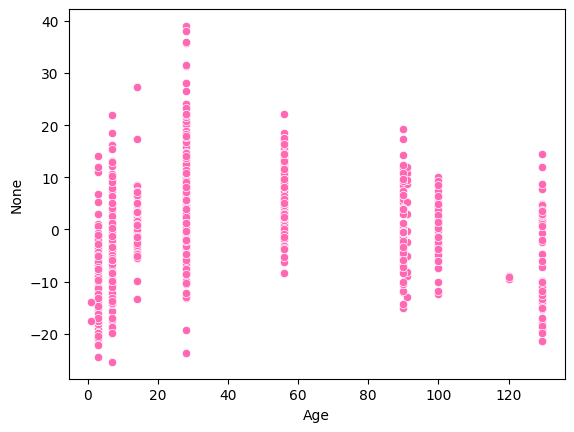

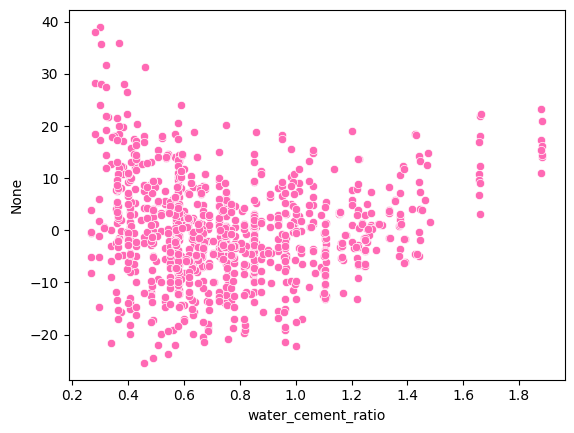

In [ ]:
for i in x.columns:
  sns.scatterplot( y = model.resid, x = x[i],color = 'hotpink')
  plt.show()

In [ ]:
# Rainbow Test

from statsmodels.stats.diagnostic import linear_rainbow

Ho = 'Linear Relation between Indep and Target Variable'
Ha = 'Non Linear Relation between Indep and Target Variable'

p = linear_rainbow(model)[1]

if p > 0.05:
  print('Fail to Reject Null Hypothesis')
  print(Ho)
else:
  print('Reject Null Hypothesis')
  print(Ha)

Fail to Reject Null Hypothesis
Linear Relation between Indep and Target Variable


## **Assumption 4 : Autocorrelation**

In [ ]:
d = 1.221

# we can conclude that there is positive autocorrelation
# There is also a chance that we are getting this value due to small sample size

## **Assumption 5 : Homoscedasticity**

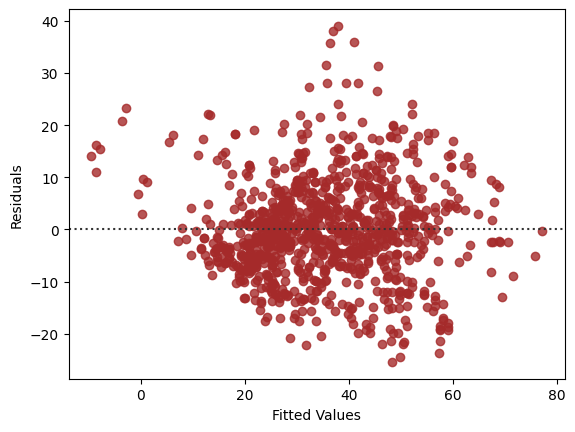

In [ ]:
# Residual Plot
sns.residplot(x = model.fittedvalues, y = model.resid, color = 'brown')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Breuch Pagon Tests

Ho = 'There is homoscedasticity'
Ha = 'There is no homoscedasticity'

p= sma.stats.diagnostic.het_breuschpagan(exog_het = x_c.values, resid = model.resid)[1]

if p > 0.05:
  print('Fail to Reject Null Hypothesis')
  print(Ho)
else:
  print('Reject Null Hypothesis')
  print(Ha)

Reject Null Hypothesis
There is no homoscedasticity


In [ ]:
sma.stats.diagnostic.het_goldfeldquandt(x = x_c.values, y = model.resid)[1]


0.9989684719591718

## **Assumption 6 : Normality**

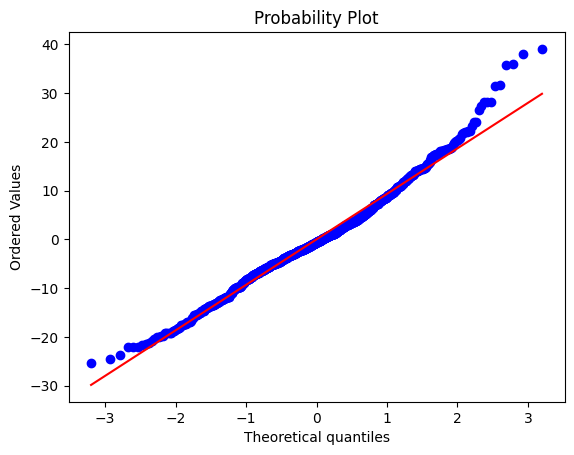

In [ ]:
# QQ (Quantile vs Quanitle Plot)
stats.probplot(model.resid, plot = plt)
plt.show()

In [ ]:
# Shapiro Test

Ho = 'Data is Normal'
Ha = "Data is not Normal"

print(f'Shapiro Test Statistic is {stats.shapiro(model.resid).statistic}')
print(f'Shapiro Test pvalue is {stats.shapiro(model.resid).pvalue}')

p = stats.shapiro(model.resid).pvalue

if p > 0.05:
  print('Fail to Reject Null Hypothesis')
  print(Ho)
else:
  print('Reject Null Hypothesis')
  print(Ha)

Shapiro Test Statistic is 0.9846725093529696
Shapiro Test pvalue is 8.975987567525453e-09
Reject Null Hypothesis
Data is not Normal


# Business Interpretation

In [ ]:
# Significant Columns
model.pvalues.sort_values()

# Here Age is the most significant columns

,0
const,1.644812e-203
Age,1.019237e-129
water_cement_ratio,2.023594e-110
Blast Furnace Slag,2.551503e-58
Superplasticizer,3.541361e-18
Fly Ash,7.008803e-09


In [ ]:
# Effect Of Independent Variables on CCS
model.params

,0
const,39.596189
Blast Furnace Slag,0.079809
Fly Ash,0.039562
Superplasticizer,0.600157
Age,0.236871
water_cement_ratio,-32.959759


In [ ]:
# Effect Of Independent Variables on CCS
model.conf_int()

,0,1
const,37.608241,41.584138
Blast Furnace Slag,0.070708,0.088910
Fly Ash,0.026271,0.052853
Superplasticizer,0.467261,0.733054
Age,0.220434,0.253308
water_cement_ratio,-35.502908,-30.416609


# **Predictive Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, mean_absolute_error,mean_absolute_percentage_error, mean_squared_error)
from sklearn.preprocessing import PowerTransformer

In [ ]:
y = data['ccs']
x = data.drop(columns = 'ccs')

In [ ]:
# Base Model

model_lr = LinearRegression()

model_lr.fit(x,y)

LinearRegression()

In [ ]:
# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state = 0)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(804, 8) (201, 8) (804,) (201,)


In [ ]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
model_lr.coef_

array([ 0.11408885,  0.09772627,  0.08242726, -0.1917599 ,  0.17141977,
        0.01168966,  0.01659225,  0.25023773])

In [ ]:
model_lr.intercept_

-8.102624717950647

In [ ]:
y_pred = model_lr.predict(x_test)

In [ ]:
print('R2', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', (mean_squared_error(y_test, y_pred))**0.5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 0.7179665342052457
MSE 73.6653581203042
MAE 6.690355643332341
RMSE 8.582852563122835
MAPE 0.2532588300679761


In [ ]:
# For eg if we use decision tree regressor

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth = 5)
model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict(x_test)


print('R2', r2_score(y_test, y_pred_dt))
print('MSE', mean_squared_error(y_test, y_pred_dt))
print('MAE', mean_absolute_error(y_test, y_pred_dt))
print('RMSE', (mean_squared_error(y_test, y_pred_dt))**0.5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_dt))

R2 0.7712447826897694
MSE 59.74941646573766
MAE 6.063482493159542
RMSE 7.729774671084382
MAPE 0.24315202163291852


In [ ]:
# For eg if we use XG Boost

from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators = 150)
model_xgb.fit(x_train,y_train)

y_pred_xgb = model_xgb.predict(x_test)


print('R2', r2_score(y_test, y_pred_xgb))
print('MSE', mean_squared_error(y_test, y_pred_xgb))
print('MAE', mean_absolute_error(y_test, y_pred_xgb))
print('RMSE', (mean_squared_error(y_test, y_pred_xgb))**0.5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_xgb))

R2 0.9363457923429108
MSE 16.626076588854573
MAE 2.8491854971222983
RMSE 4.077508625233621
MAPE 0.10448910248945494


In [ ]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5


In [ ]:
c = 450
bfs = 100
fl = 0
w = 130
sp = 2
ca = 900
fa = 550
a = 30

In [ ]:
model_xgb.predict([[c,bfs,fl,w,sp,ca,fa,a]])

array([55.927998], dtype=float32)

In [ ]:
model_dt.predict([[c,bfs,fl,w,sp,ca,fa,a]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65.87411084])

In [ ]:
model_lr.predict([[c,bfs,fl,w,sp,ca,fa,a]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55.577596])

## **Bias And Variance**

In [ ]:
y_pred_train= model_xgb.predict(x_test)


print('R2', r2_score(y_test, y_pred_xgb))
print('MSE', mean_squared_error(y_test, y_pred_xgb))
print('MAE', mean_absolute_error(y_test, y_pred_xgb))
print('RMSE', (mean_squared_error(y_test, y_pred_xgb))**0.5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_xgb))

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

In [ ]:
 model_lasso = Lasso(alpha = 5)

In [ ]:
model_lasso.fit(x_train, y_train)

Lasso(alpha=5)

In [ ]:
model_lasso.score(x_test, y_test)

0.7152108343032515

# **HyperParameter Testing**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Lets tune alpha parameter in LASSO

grid = {'alpha' : [0.1,1,5,10,20,50,100]}

In [ ]:
gscv = GridSearchCV(estimator = Lasso(), param_grid = grid, scoring = 'r2', cv = 7, verbose = 4)

In [ ]:
gscv.fit(x,y)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
[CV 1/7] END .........................alpha=0.1;, score=0.382 total time=   0.0s
[CV 2/7] END .........................alpha=0.1;, score=0.809 total time=   0.0s
[CV 3/7] END .........................alpha=0.1;, score=0.498 total time=   0.1s
[CV 4/7] END .........................alpha=0.1;, score=0.640 total time=   0.0s
[CV 5/7] END .........................alpha=0.1;, score=0.680 total time=   0.0s
[CV 6/7] END .........................alpha=0.1;, score=0.656 total time=   0.0s
[CV 7/7] END .........................alpha=0.1;, score=0.580 total time=   0.0s
[CV 1/7] END ...........................alpha=1;, score=0.400 total time=   0.0s
[CV 2/7] END ...........................alpha=1;, score=0.807 total time=   0.0s
[CV 3/7] END ...........................alpha=1;, score=0.498 total time=   0.0s
[CV 4/7] END ...........................alpha=1;, score=0.634 total time=   0.0s
[CV 5/7] END ...........................alpha=1;,

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50, 100]}, scoring='r2',
             verbose=4)

In [ ]:
gscv.best_score_

0.6134819000032039

In [ ]:
gscv.best_params_

{'alpha': 5}

In [ ]:
grid = {'alpha' : [0.1,1,5,10,20,50,100], 'l1_ratio' : [0.01,0.05,0.10,0.15,0.20]}

In [ ]:
gscv = GridSearchCV(estimator = ElasticNet(), param_grid = grid, scoring = 'r2', cv = 5, verbose = 3)

In [ ]:
gscv.fit(x,y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.568 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.596 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.641 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.763 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.511 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.568 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.596 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.641 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.763 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.511 total time=   0.0s
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.568 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.1

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50, 100],
                         'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.2]},
             scoring='r2', verbose=3)

In [ ]:
gscv.best_score_

0.6279115503067937

In [ ]:
gscv.best_params_

{'alpha': 20, 'l1_ratio': 0.01}